In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge
rpy.set_seed(42) 

In [3]:
from sklearn.metrics import r2_score    

# SINAL APRBS DO BCS

In [4]:
# Parâmetros do sinal 
t_final, dt = 500, 1/60             # final e passo
t = np.arange(0, t_final, dt)
min_step, max_step = 60/60, 600/60 # tempo entre trocas


FRENQUÊNCIA:

In [5]:
# Sinal de Frequência APRBS
min_value_f, max_value_f = 35, 60   # limites
f = np.zeros_like(t)

current_value = np.random.uniform(min_value_f, max_value_f)
time_next_change = 0

for i in range(len(t)):
    if t[i] >= time_next_change:
        current_value = np.random.uniform(min_value_f, max_value_f)
        time_next_change = t[i] + np.random.uniform(min_step, max_step)
        #print(time_next_change-t[i])
    f[i] = current_value

ABERTURA DE VÁLVULA:

In [6]:
# Sinal de Abertura APRBS
min_value_zc, max_value_zc = 0, 100   # limites
Zc = np.zeros_like(t)

current_value = np.random.uniform(min_value_zc, max_value_zc)
time_next_change = 0

for i in range(len(t)):
    if t[i] >= time_next_change:
        current_value = np.random.uniform(min_value_zc, max_value_zc)
        time_next_change = t[i] + np.random.uniform(min_step, max_step)
        #print(time_next_change-t[i])
    Zc[i] = current_value

PLOT GRÁFICO:

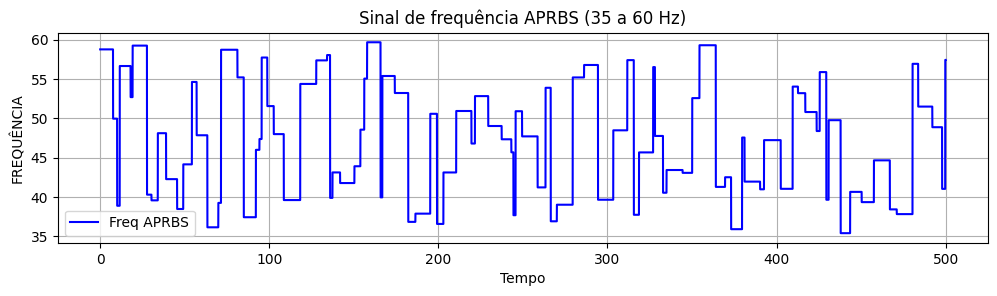

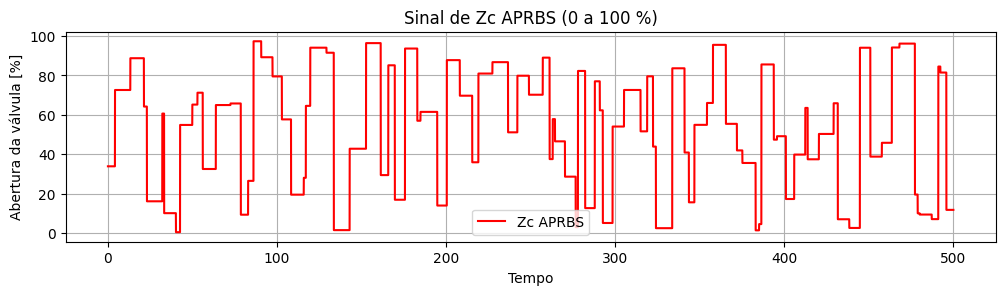

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t, f, label="Freq APRBS", color='b')
plt.xlabel("Tempo")
plt.ylabel("FREQUÊNCIA")
plt.title("Sinal de frequência APRBS (35 a 60 Hz)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t, Zc, label="Zc APRBS", color='r')
plt.xlabel("Tempo")
plt.ylabel("Abertura da válvula [%]")
plt.title("Sinal de Zc APRBS (0 a 100 %)")
plt.grid(True)
plt.legend()
plt.show()

ARQUIVO CSV:

In [8]:
Entradas = pd.DataFrame({
    "f(Hz)": f,
    "Zc(%)": Zc
})
print(Entradas)
 
Entradas.to_csv("Entradas_BCS.csv", index=False)

           f(Hz)      Zc(%)
0      58.767858  33.902979
1      58.767858  33.902979
2      58.767858  33.902979
3      58.767858  33.902979
4      58.767858  33.902979
...          ...        ...
29995  57.430394  11.816483
29996  57.430394  11.816483
29997  57.430394  11.816483
29998  57.430394  11.816483
29999  57.430394  11.816483

[30000 rows x 2 columns]


# IMPORTE RESPOSTAS

# GERANDO MODELO

ESTRUTURA:

In [9]:
reservoir = Reservoir(100, lr=0.5, sr=0.9)
readout = Ridge(ridge=1e-7)

BCS_model = reservoir >> readout

TREINAMENTO:

In [10]:
#BCS_model = BCS_model.fit(X_train, Y_train, warmup=20)

VERIFICANDO INICIALIZAÇÃO:

In [11]:
print(reservoir.initialized, readout.initialized)

False False


RESULTADO:

In [12]:
'''
Y_pred = esn_model.run(X_test)
 
plt.figure(figsize=(10, 3))
plt.title("PREDIÇÃO TEMPORAL")
plt.xlabel("$Tempo$")
plt.plot(Y_pred, label="Sen(t) Predito", color="blue", linestyle="-")
plt.plot(X[51:], label="Sen(t+1) Real", color="red", linestyle="-.")
plt.grid()
plt.legend()
plt.show()
'''

'\nY_pred = esn_model.run(X_test)\n\nplt.figure(figsize=(10, 3))\nplt.title("PREDIÇÃO TEMPORAL")\nplt.xlabel("$Tempo$")\nplt.plot(Y_pred, label="Sen(t) Predito", color="blue", linestyle="-")\nplt.plot(X[51:], label="Sen(t+1) Real", color="red", linestyle="-.")\nplt.grid()\nplt.legend()\nplt.show()\n'